# Case Study 3.1

In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:
1. Load the penguins dataset using the code snippet provided below.
2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.
3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.
5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.

1- Load the penguins dataset

In [1]:
# Import the 'load_dataset' function from seaborn to load the penguins dataset
from seaborn import load_dataset

# Load the penguins dataset and store it in the 'df' DataFrame
df = load_dataset('penguins')

# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


2- Perform initial data exploration

In [2]:
# Display summary of information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
# Display the dataset's statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


3- Address any data quality issues

*3.1 Missing Values*

In [4]:
# Display the rows contained missing values
print("The rows contained missing values:\n")
print(df[df.isnull().any(axis=1)])
print("--------------------------------------------")
# Display the number of missing values
print(f"The number of missing values in each column:\n{df.isnull().sum()}")
print("--------------------------------------------")
total_missing_values = df.isnull().any(axis=1).sum()
percantage = total_missing_values*100/df.shape[0]
print(f"The total number of rows with missing values = {total_missing_values}, with a percantage = {percantage}%")

The rows contained missing values:

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8  

In [5]:
# Replace null values with the mean value of the nemarical columns
numarical_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in numarical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

# Replace null values with the mode value (the most frequented value) of the categorical columns
categorical_columns = ["species", "island", "sex"]
for col in categorical_columns:
  df[col].fillna(df[col].mode().iloc[0], inplace=True)

# We can instead delete the rows with null values using this:
# df.dropna(inplace=True)

print(f"The number of missing values after imputation:\n{df.isnull().sum()}")

The number of missing values after imputation:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


*3.2- Outliers*

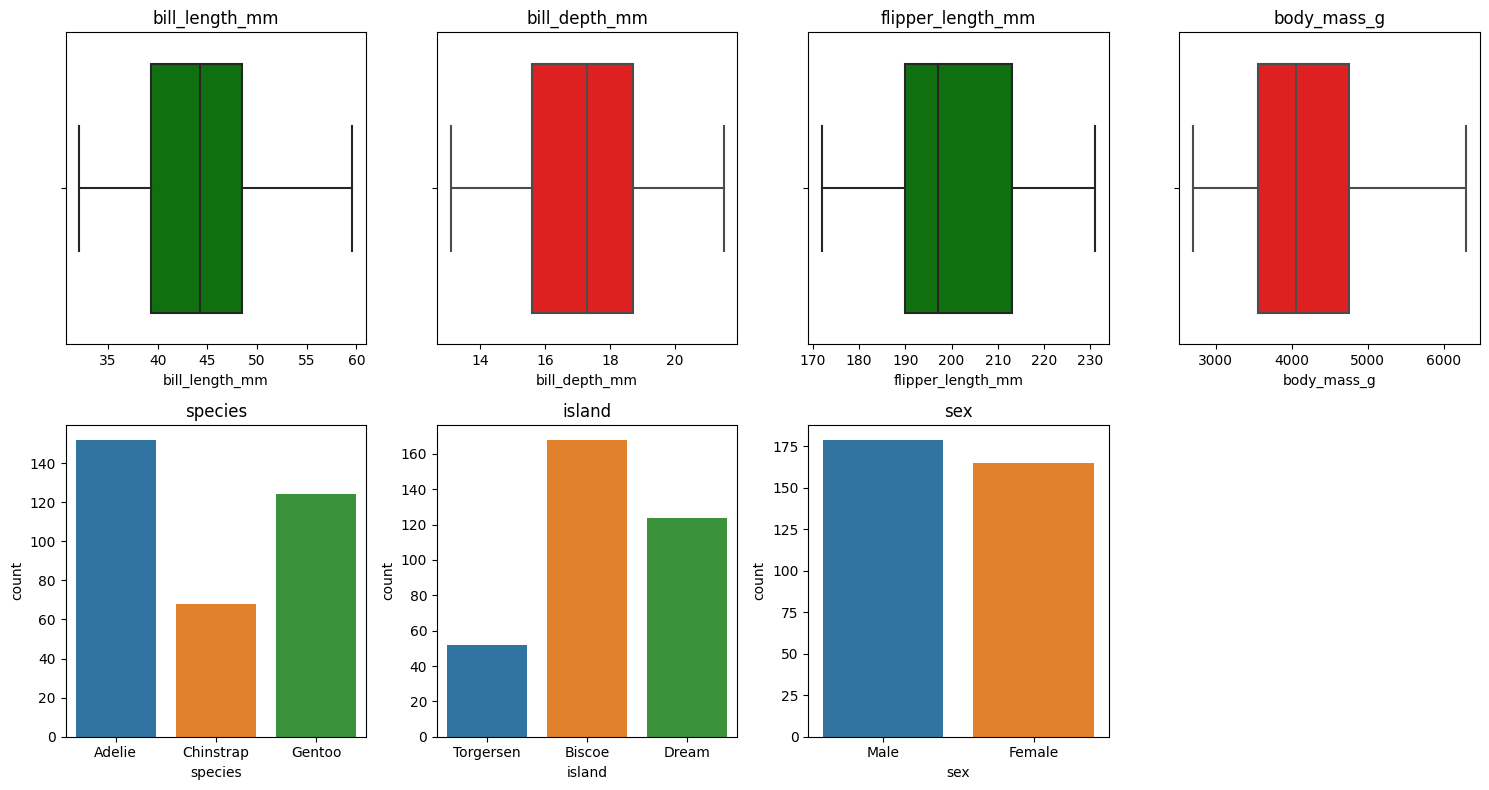

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot each column to see if there are any outliers
plt.figure(figsize=(15, 8))

for i, col in enumerate(numarical_columns, start=1):
  plt.subplot(2, 4, i)
  plt.title(col)
  sns.boxplot(data=df, x=col, color='g' if i%2==1 else 'r')

for i, col in enumerate(categorical_columns, start=5):
  plt.subplot(2, 4, i)
  plt.title(col)
  sns.countplot(data=df, x=col)

plt.tight_layout()
plt.show()

from the figures above we can see that there is no outliars based on IQR, but to make sure we will count the number of them

In [7]:
# find the number of outliers based on Interquartile Range IQR and z-score
for col in numarical_columns:
  # calculating outliers number based on IQR
  percentile75 = df[col].quantile(0.75)
  percentile25 = df[col].quantile(0.25)
  IQR = percentile75 - percentile25
  upper_iqr = percentile75 + 1.5*IQR
  lower_iqr = percentile25 - 1.5*IQR
  n_oultiers_iqr = df[(df[col] < lower_iqr) | (df[col] > upper_iqr)].shape[0]

  # calculating outliers number based on z-score
  mean = df[col].mean()
  std = df[col].std()
  upper_z = mean + 2.5*std
  lower_z = mean - 2.5*std
  n_oultiers_z = df[(df[col] < lower_z) | (df[col] > upper_z)].shape[0]
  print(f'for column: {col}')
  print(f'# of outliars based on IQR = {n_oultiers_iqr}')
  if(n_oultiers_iqr > 0):
    print("outliers values:")
    print(df.loc[(df[col] < lower_iqr) | (df[col] > upper_iqr), [col]].values)
  print(f'# of outliars based on z-score = {n_oultiers_z}')
  if(n_oultiers_z > 0):
    print("outliers values:")
    print(df.loc[(df[col] < lower_z) | (df[col] > upper_z), [col]].values)
  print("")


for column: bill_length_mm
# of outliars based on IQR = 0
# of outliars based on z-score = 2
outliers values:
[[58. ]
 [59.6]]

for column: bill_depth_mm
# of outliars based on IQR = 0
# of outliars based on z-score = 0

for column: flipper_length_mm
# of outliars based on IQR = 0
# of outliars based on z-score = 0

for column: body_mass_g
# of outliars based on IQR = 0
# of outliars based on z-score = 1
outliers values:
[[6300.]]



4- Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.

5- If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.

In [8]:
# the dataset contains categorical variables, so we have to encode them first
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
  df[f'{col}_encoded'] = label_encoder.fit_transform(df[col])
  numarical_columns.append(f'{col}_encoded')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0,2,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0,2,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0,2,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,0,2,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0,2,0


In [9]:
df_encoded = df[numarical_columns]

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.10000,18.70000,181.000000,3750.000000,0,2,1
1,39.50000,17.40000,186.000000,3800.000000,0,2,0
2,40.30000,18.00000,195.000000,3250.000000,0,2,0
3,43.92193,17.15117,200.915205,4201.754386,0,2,1
4,36.70000,19.30000,193.000000,3450.000000,0,2,0


In [10]:
# analyze the relevance of each feature using varience
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Initialize the VarianceThreshold selector with a threshold 0 to not exclude anything yet
selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
selector = selector.fit(df_encoded)

# Apply the selector to the data
df_high_variance = selector.transform(df_encoded)

# Variance of the data
variances = selector.variances_

variance_df = pd.DataFrame({'Column Name': numarical_columns, 'Variance': variances})

variance_df

,Column Name,Variance
0,bill_length_mm,27.500000
1,bill_depth_mm,3.865798
2,flipper_length_mm,59.000000
3,body_mass_g,3600.000000
4,species_encoded,0.795700
5,island_encoded,0.525825
6,sex_encoded,0.249586


In [11]:
# analyze the relevance of each feature using correlations

features = df.drop(['species_encoded'], axis=1)
target = df['species_encoded']

feature_correlations = features.corrwith(target).abs()

feature_correlations

<ipython-input-11-b95b10650e29>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_correlations = features.corrwith(target).abs()


bill_length_mm       0.728674
bill_depth_mm        0.741335
flipper_length_mm    0.851160
body_mass_g          0.747726
island_encoded       0.635659
sex_encoded          0.010240
dtype: float64

In [12]:
# remove the sex feature because it has the smallest value of each of correlation and variance
df_encoded.drop(['sex_encoded'], axis=1, inplace=True)
df_encoded.head()

<ipython-input-12-25511bbdc6cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(['sex_encoded'], axis=1, inplace=True)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded
0,39.10000,18.70000,181.000000,3750.000000,0,2
1,39.50000,17.40000,186.000000,3800.000000,0,2
2,40.30000,18.00000,195.000000,3250.000000,0,2
3,43.92193,17.15117,200.915205,4201.754386,0,2
4,36.70000,19.30000,193.000000,3450.000000,0,2


6- Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

In [13]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['species_encoded'], axis=1)
y = df_encoded['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95)

7- Scale or normalize the numerical features to ensure consistent scaling across variables.

In [14]:
# apply the MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

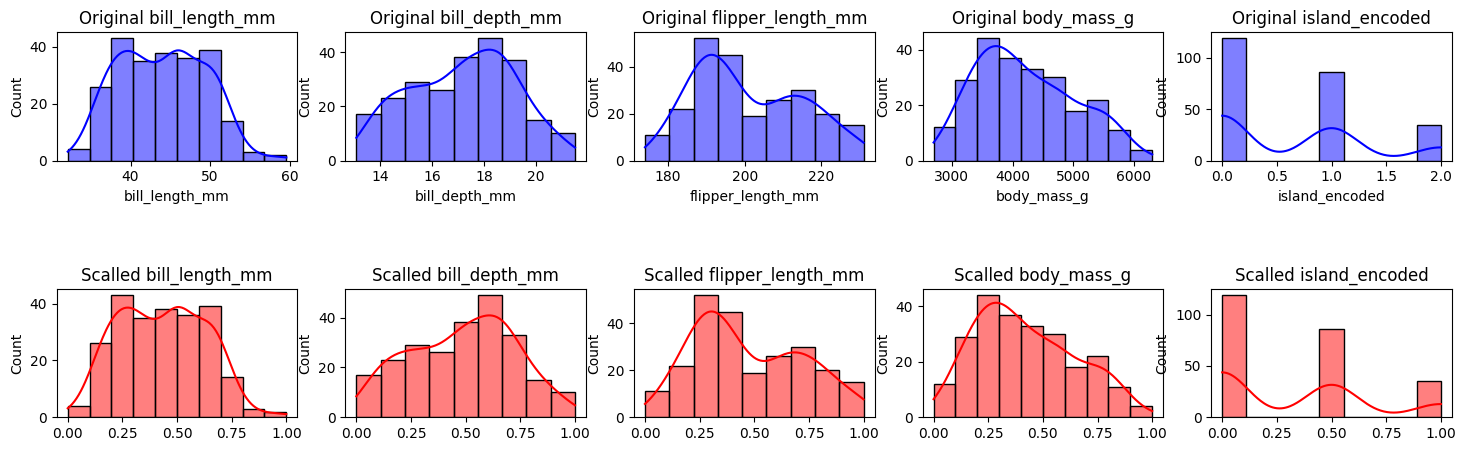

In [15]:
# plot the original and scaled X_train
fig, axs = plt.subplots(figsize=(18, 5),ncols=5,nrows=2)
for i, col in enumerate(X.columns):
  sns.histplot(x=X_train[col], ax=axs[0,i], color='b', kde=True);axs[0,i].set_title(f"Original {col}")
  sns.histplot(x=X_train_scaled[:, i], ax=axs[1,i], color='r', kde=True);axs[1,i].set_title(f"Scalled {col}")

fig.subplots_adjust(hspace=1)

8- Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.

In [16]:
from sklearn.decomposition import PCA

X_train, X_test = X_train_scaled, X_test_scaled
pca = PCA(n_components=4)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

print(f"PCA components' explained variance ratio are: {pca.explained_variance_ratio_}")

PCA components' explained variance ratio are: [0.64935062 0.18625237 0.10120047 0.04492102]


In [17]:
pca_train_df = pd.DataFrame(pca_X_train)
pca_train_df.head()

,0,1,2,3
0,-0.586231,0.053876,-0.269822,-0.015825
1,0.298754,0.109630,-0.118591,0.039950
2,0.286678,-0.182075,0.345504,0.206561
3,0.124784,0.653080,-0.010966,0.080850
4,0.271184,-0.015260,0.031238,0.206238


In [18]:
pca_test_df = pd.DataFrame(pca_X_test)
pca_test_df.head()

,0,1,2,3
0,0.667565,-0.186492,-0.263780,-0.027812
1,-0.625790,-0.179056,0.050009,-0.266668
2,0.415893,0.276731,-0.173639,-0.106978
3,0.748180,-0.122641,-0.223612,-0.014092
4,0.725870,-0.259876,-0.066332,-0.157803


9- Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.

In [19]:
# training the model on the preprocessed data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(random_state=42)
classifier.fit(pca_X_train, y_train)
y_pred = classifier.predict(pca_X_test)
preprocessing_accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy on the preprocessed data = {preprocessing_accuracy}')

The accuracy on the preprocessed data = 0.9903846153846154


In [20]:
# training the model on the raw data
df_raw = load_dataset('penguins')

# delete raws that contain null values because the classifier does not accept null values
df_raw.dropna(axis=0, inplace=True)

# encode the non numerical values so the classifier can take them
df_raw['island_encoded'] = label_encoder.fit_transform(df_raw['island'])
df_raw['sex_encoded'] = label_encoder.fit_transform(df_raw['sex'])
df_raw['species_encoded'] = label_encoder.fit_transform(df_raw['species'])

df_raw.drop(['island', 'sex', 'species'], axis=1, inplace=True)

In [21]:
X_raw = df_raw.drop(['species_encoded'], axis=1)
y_raw = df_raw['species_encoded']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=95)

classifier_raw = RandomForestClassifier(random_state=42)
classifier_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = classifier_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)

print(f'The accuracy on the raw data = {accuracy_raw}')

The accuracy on the raw data = 0.98
